In [ ]:
import requests
import json
import numpy as np
import pandas as pd
import nltk 
import matplotlib
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import re
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

In [ ]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [ ]:
url = 'https://newsapi.org/v2/everything?'
api_key = 'f51de79da1804680885d379ad2f4cb68'

In [ ]:
# function to take raw data from the API and process it into a list inorder to trnasform it into a pandas dataframe
def get_articles(file): 
    article_results = [] 
    for i in range(len(file)):
        article_dict = {}
        article_dict['title'] = file[i]['title']
        article_dict['author'] = file[i]['author']
        article_dict['source'] = file[i]['source']
        article_dict['description'] = file[i]['description']
        article_dict['content'] = file[i]['content']
        article_dict['pub_date'] = file[i]['publishedAt']
        article_dict['url'] = file[i]["url"]
        article_dict['photo_url'] = file[i]['urlToImage']
        article_results.append(article_dict)
    return article_results

In [ ]:
# Collecting the first 100 articles about ireland to check the API and the working of the function 
parameters_headlines = {
    'q': 'Tesla',
    'sortBy':'popularity',
    'pageSize': 100,
    'apiKey': api_key,
    'language': 'en',
    'from' : '2021-04-13'    
}
# making the API call 
response_headline = requests.get(url, params = parameters_headlines)
response_json_headline = response_headline.json()
responses = response_json_headline['articles']
# transforminf the data from JSON dictionary to a pandas data frame
news_articles_df = pd.DataFrame(get_articles(responses))
# printing the head to check the format and the working of the get_articles function
news_articles_df.head()

,title,author,source,description,content,pub_date,url,photo_url
0,Tesla 'suspends' Bitcoin car purchases citing ...,https://www.engadget.com/about/editors/richard...,"{'id': 'engadget', 'name': 'Engadget'}",You can't buy a Tesla with Bitcoin anymore..,Just weeks after Tesla started accepting Bitco...,2021-05-12T22:17:08Z,https://www.engadget.com/elon-musk-bitcoin-221...,https://s.yimg.com/os/creatr-uploaded-images/2...
1,Tesla's Powerwall+ is a higher-power battery f...,https://www.engadget.com/about/editors/mariell...,"{'id': 'engadget', 'name': 'Engadget'}",Tesla has started sending potential customers ...,It looks like Tesla has started sending potent...,2021-05-01T15:44:50Z,https://www.engadget.com/tesla-powerwall-plus-...,https://s.yimg.com/os/creatr-uploaded-images/2...
2,Elon Musk: Data recovered 'so far' shows Autop...,https://www.engadget.com/about/editors/mat-smith,"{'id': 'engadget', 'name': 'Engadget'}","Tesla 'technoking' Elon Musk said that so far,...",This weekend two men aged 59 and 69 died when ...,2021-04-20T01:12:33Z,https://www.engadget.com/tesla-crash-texas-011...,https://s.yimg.com/os/creatr-uploaded-images/2...
3,The Morning After: Amazon cancels its 'Lord of...,https://www.engadget.com/about/editors/mat-smith,"{'id': 'engadget', 'name': 'Engadget'}",Today’s headlines: New York caps the cost of b...,Amazon told Bloomberg thatit has canned its Lo...,2021-04-19T11:30:30Z,https://www.engadget.com/the-morning-after-ama...,https://s.yimg.com/os/creatr-uploaded-images/2...
4,Riding in the Lucid Air luxury EV,https://www.engadget.com/about/editors/roberto...,"{'id': 'engadget', 'name': 'Engadget'}",Ahead of beginning the deliveries of the Lucid...,Ahead of beginning the deliveries of the Lucid...,2021-04-21T14:00:41Z,https://www.engadget.com/lucid-air-grand-touri...,https://s.yimg.com/os/creatr-uploaded-images/2...


In [ ]:
responses = list() # stores responses for various news sources
domains = ['wsj.com','aljazeera.com','bbc.co.uk','techcrunch.com', 'nytimes.com','bloomberg.com','businessinsider.com',
             'cbc.ca','cnbc.com','cnn.com','ew.com','espn.go.com','espncricinfo.com','foxnews.com', 'apnews.com',
             'news.nationalgeographic.com','nymag.com','reuters.com','rte.ie','thehindu.com','huffingtonpost.com',
             'irishtimes.com','timesofindia.indiatimes.com','washingtonpost.com','time.com','medicalnewstoday.com',
             'ndtv.com','theguardian.com','dailymail.co.uk','firstpost.com','thejournal.ie', 'hindustantimes.com',
             'economist.com','news.vice.com','usatoday.com','telegraph.co.uk','metro.co.uk','mirror.co.uk','news.google.com']
for domain in domains:
    parameters_headlines = {
    'domains':format(domain),
    'sortBy':'popularity',
    'pageSize': 100,
    'apiKey': api_key,
    'language': 'en',
    'from' : '2021-04-13'    
    }
    rr = requests.get(url, params = parameters_headlines)
    data = rr.json()
    responses = data["articles"]
    news_articles_df=news_articles_df.append(pd.DataFrame(get_articles(responses)))

In [ ]:
print(news_articles_df.shape)
news_articles_df.head()

(2905, 8)


,title,author,source,description,content,pub_date,url,photo_url
0,Tesla 'suspends' Bitcoin car purchases citing ...,https://www.engadget.com/about/editors/richard...,"{'id': 'engadget', 'name': 'Engadget'}",You can't buy a Tesla with Bitcoin anymore..,Just weeks after Tesla started accepting Bitco...,2021-05-12T22:17:08Z,https://www.engadget.com/elon-musk-bitcoin-221...,https://s.yimg.com/os/creatr-uploaded-images/2...
1,Tesla's Powerwall+ is a higher-power battery f...,https://www.engadget.com/about/editors/mariell...,"{'id': 'engadget', 'name': 'Engadget'}",Tesla has started sending potential customers ...,It looks like Tesla has started sending potent...,2021-05-01T15:44:50Z,https://www.engadget.com/tesla-powerwall-plus-...,https://s.yimg.com/os/creatr-uploaded-images/2...
2,Elon Musk: Data recovered 'so far' shows Autop...,https://www.engadget.com/about/editors/mat-smith,"{'id': 'engadget', 'name': 'Engadget'}","Tesla 'technoking' Elon Musk said that so far,...",This weekend two men aged 59 and 69 died when ...,2021-04-20T01:12:33Z,https://www.engadget.com/tesla-crash-texas-011...,https://s.yimg.com/os/creatr-uploaded-images/2...
3,The Morning After: Amazon cancels its 'Lord of...,https://www.engadget.com/about/editors/mat-smith,"{'id': 'engadget', 'name': 'Engadget'}",Today’s headlines: New York caps the cost of b...,Amazon told Bloomberg thatit has canned its Lo...,2021-04-19T11:30:30Z,https://www.engadget.com/the-morning-after-ama...,https://s.yimg.com/os/creatr-uploaded-images/2...
4,Riding in the Lucid Air luxury EV,https://www.engadget.com/about/editors/roberto...,"{'id': 'engadget', 'name': 'Engadget'}",Ahead of beginning the deliveries of the Lucid...,Ahead of beginning the deliveries of the Lucid...,2021-04-21T14:00:41Z,https://www.engadget.com/lucid-air-grand-touri...,https://s.yimg.com/os/creatr-uploaded-images/2...


In [ ]:
# function to exatract just the name of the source of the news article and exclude other details
def source_getter(df):
    source = []
    for source_dict in df['source']:
        source.append(source_dict['name'])
    df['source'] = source #append the source to the df

In [ ]:
source_getter(news_articles_df)

In [ ]:
news_articles_df['pub_date'] = pd.to_datetime(news_articles_df['pub_date']).apply(lambda x: x.date())

In [ ]:
#look for missing data
news_articles_df.isnull().sum()

title            0
author         250
source           0
description      2
content          0
pub_date         0
url              0
photo_url       24
dtype: int64

In [ ]:
# droping the rows with missing data 
news_articles_df.dropna(inplace=True)
news_articles_df = news_articles_df[~news_articles_df['description'].isnull()]
# summarize the number of rows and columns in the dataset
print(news_articles_df.isnull().sum())
print(news_articles_df.shape)

title          0
author         0
source         0
description    0
content        0
pub_date       0
url            0
photo_url      0
dtype: int64
(2633, 8)


In [ ]:
# combine the title and the content to get one dataframe column
news_articles_df['combined_text'] = news_articles_df['title'].map(str) +" "+ news_articles_df['content'].map(str)

In [ ]:
news_articles_df.head()

,title,author,source,description,content,pub_date,url,photo_url,combined_text
0,Tesla 'suspends' Bitcoin car purchases citing ...,https://www.engadget.com/about/editors/richard...,Engadget,You can't buy a Tesla with Bitcoin anymore..,Just weeks after Tesla started accepting Bitco...,2021-05-12,https://www.engadget.com/elon-musk-bitcoin-221...,https://s.yimg.com/os/creatr-uploaded-images/2...,Tesla 'suspends' Bitcoin car purchases citing ...
1,Tesla's Powerwall+ is a higher-power battery f...,https://www.engadget.com/about/editors/mariell...,Engadget,Tesla has started sending potential customers ...,It looks like Tesla has started sending potent...,2021-05-01,https://www.engadget.com/tesla-powerwall-plus-...,https://s.yimg.com/os/creatr-uploaded-images/2...,Tesla's Powerwall+ is a higher-power battery f...
2,Elon Musk: Data recovered 'so far' shows Autop...,https://www.engadget.com/about/editors/mat-smith,Engadget,"Tesla 'technoking' Elon Musk said that so far,...",This weekend two men aged 59 and 69 died when ...,2021-04-20,https://www.engadget.com/tesla-crash-texas-011...,https://s.yimg.com/os/creatr-uploaded-images/2...,Elon Musk: Data recovered 'so far' shows Autop...
3,The Morning After: Amazon cancels its 'Lord of...,https://www.engadget.com/about/editors/mat-smith,Engadget,Today’s headlines: New York caps the cost of b...,Amazon told Bloomberg thatit has canned its Lo...,2021-04-19,https://www.engadget.com/the-morning-after-ama...,https://s.yimg.com/os/creatr-uploaded-images/2...,The Morning After: Amazon cancels its 'Lord of...
4,Riding in the Lucid Air luxury EV,https://www.engadget.com/about/editors/roberto...,Engadget,Ahead of beginning the deliveries of the Lucid...,Ahead of beginning the deliveries of the Lucid...,2021-04-21,https://www.engadget.com/lucid-air-grand-touri...,https://s.yimg.com/os/creatr-uploaded-images/2...,Riding in the Lucid Air luxury EV Ahead of beg...


In [ ]:
# Function to remove non-ascii characters from the text
def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)
# function to remove the punctuations, apostrophe, special characters using regular expressions
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    return text
# stop words are the words that convery little to no information about the actual content like the words:the, of, for etc
def remove_stopwords(word_tokens):
    filtered_sentence = [] 
    stop_words = stopwords.words('english')
    specific_words_list = ['char', 'u', 'hindustan', 'doj', 'washington'] 
    stop_words.extend(specific_words_list )
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    return filtered_sentence
# function for lemmatization 
def lemmatize(x):
    lemmatizer = WordNetLemmatizer()
    return' '.join([lemmatizer.lemmatize(word) for word in x])

In [ ]:
# splitting a string, text into a list of tokens
tokenizer = RegexpTokenizer(r'\w+')
def tokenize(x): 
    return tokenizer.tokenize(x)

In [ ]:
# applying all of these functions to the our dataframe 
news_articles_df['combined_text'] = news_articles_df['combined_text'].map(clean_text)
news_articles_df['tokens'] = news_articles_df['combined_text'].map(tokenize)
news_articles_df['tokens'] = news_articles_df['tokens'].map(remove_stopwords)
news_articles_df['lems'] =news_articles_df['tokens'].map(lemmatize)

In [ ]:
news_articles_df.head()

,title,author,source,description,content,pub_date,url,photo_url,combined_text,tokens,lems
0,Tesla 'suspends' Bitcoin car purchases citing ...,https://www.engadget.com/about/editors/richard...,Engadget,You can't buy a Tesla with Bitcoin anymore..,Just weeks after Tesla started accepting Bitco...,2021-05-12,https://www.engadget.com/elon-musk-bitcoin-221...,https://s.yimg.com/os/creatr-uploaded-images/2...,tesla is uspends bitcoin car purchases citing ...,"[tesla, uspends, bitcoin, car, purchases, citi...",tesla uspends bitcoin car purchase citing envi...
1,Tesla's Powerwall+ is a higher-power battery f...,https://www.engadget.com/about/editors/mariell...,Engadget,Tesla has started sending potential customers ...,It looks like Tesla has started sending potent...,2021-05-01,https://www.engadget.com/tesla-powerwall-plus-...,https://s.yimg.com/os/creatr-uploaded-images/2...,tesla is powerwall is a higher power battery f...,"[tesla, powerwall, higher, power, battery, gri...",tesla powerwall higher power battery grid livi...
2,Elon Musk: Data recovered 'so far' shows Autop...,https://www.engadget.com/about/editors/mat-smith,Engadget,"Tesla 'technoking' Elon Musk said that so far,...",This weekend two men aged 59 and 69 died when ...,2021-04-20,https://www.engadget.com/tesla-crash-texas-011...,https://s.yimg.com/os/creatr-uploaded-images/2...,elon musk data recovered is o far shows autopi...,"[elon, musk, data, recovered, far, shows, auto...",elon musk data recovered far show autopilot en...
3,The Morning After: Amazon cancels its 'Lord of...,https://www.engadget.com/about/editors/mat-smith,Engadget,Today’s headlines: New York caps the cost of b...,Amazon told Bloomberg thatit has canned its Lo...,2021-04-19,https://www.engadget.com/the-morning-after-ama...,https://s.yimg.com/os/creatr-uploaded-images/2...,the morning after amazon cancels its lord of t...,"[morning, amazon, cancels, lord, rings, mmorpg...",morning amazon cancel lord ring mmorpg amazon ...
4,Riding in the Lucid Air luxury EV,https://www.engadget.com/about/editors/roberto...,Engadget,Ahead of beginning the deliveries of the Lucid...,Ahead of beginning the deliveries of the Lucid...,2021-04-21,https://www.engadget.com/lucid-air-grand-touri...,https://s.yimg.com/os/creatr-uploaded-images/2...,riding in the lucid air luxury ev ahead of beg...,"[riding, lucid, air, luxury, ev, ahead, beginn...",riding lucid air luxury ev ahead beginning del...


In [ ]:
print(news_articles_df.isnull().sum())
news_articles_df.dropna(inplace=True)
print(news_articles_df.shape)
print(news_articles_df.isnull().sum())

title            0
author           0
source           0
description      0
content          0
pub_date         0
url              0
photo_url        0
combined_text    0
tokens           0
lems             0
dtype: int64
(2633, 11)
title            0
author           0
source           0
description      0
content          0
pub_date         0
url              0
photo_url        0
combined_text    0
tokens           0
lems             0
dtype: int64


In [ ]:
# calculating the polarity of the news articles 
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []
for line in news_articles_df['lems'] :
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

In [ ]:
# Creating a new dataframe of only the polarity score, the headline and the source of the news 
headlines_polarity = pd.DataFrame.from_records(results)
temp = []
for line in news_articles_df['source'] :
    temp.append(line)
headlines_polarity['source'] =temp

In [ ]:
# categorize news as positive or negative based on the compound score obtained
headlines_polarity['label'] = 0
# I have considered the news as positive if the compound score is greater than 0.2 hence the label 1
headlines_polarity.loc[headlines_polarity['compound'] > 0.2, 'label'] = 1
# if the compound score is below 0.2 then it is considered negative 
headlines_polarity.loc[headlines_polarity['compound'] < -0.2, 'label'] = -1
# word count of news headlines is calculated
headlines_polarity['word_count'] = headlines_polarity['headline'].apply(lambda x: len(str(x).split()))

In [ ]:
headlines_polarity.head()

,neg,neu,pos,compound,headline,source,label,word_count
0,0.077,0.836,0.087,0.0772,tesla uspends bitcoin car purchase citing envi...,Engadget,0,27
1,0.000,0.918,0.082,0.3612,tesla powerwall higher power battery grid livi...,Engadget,1,29
2,0.231,0.769,0.000,-0.8271,elon musk data recovered far show autopilot en...,Engadget,-1,32
3,0.063,0.667,0.270,0.6705,morning amazon cancel lord ring mmorpg amazon ...,Engadget,1,26
4,0.000,0.893,0.107,0.4588,riding lucid air luxury ev ahead beginning del...,Engadget,1,27


In [ ]:
# Checking the combined data once again to ensure no null value is present
print(news_articles_df.isnull().sum())
news_articles_df.dropna(inplace=True)
print(news_articles_df.shape)
print(news_articles_df.isnull().sum())

title            0
author           0
source           0
description      0
content          0
pub_date         0
url              0
photo_url        0
combined_text    0
tokens           0
lems             0
dtype: int64
(2633, 11)
title            0
author           0
source           0
description      0
content          0
pub_date         0
url              0
photo_url        0
combined_text    0
tokens           0
lems             0
dtype: int64


In [ ]:
# calculating the polarity of the news articles 
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []
for line in news_articles_df['lems'] :
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

In [ ]:
# Creating a new dataframe of only the polarity score, the headline and the source of the news 
headlines_polaritys = pd.DataFrame.from_records(results)
temp = []
for line in news_articles_df['source'] :
    temp.append(line)
headlines_polaritys['source'] =temp

In [ ]:
# categorize news as positive or negative based on the compound score obtained
headlines_polaritys['label'] = 0
# I have considered the news as positive if the compound score is greater than 0.2 hence the label 1
headlines_polaritys.loc[headlines_polaritys['compound'] > 0.2, 'label'] = 1
# if the compound score is below 0.2 then it is considered negative 
headlines_polaritys.loc[headlines_polaritys['compound'] < -0.2, 'label'] = -1
# word count of news headlines is calculated
headlines_polaritys['word_count'] = headlines_polaritys['headline'].apply(lambda x: len(str(x).split()))

In [ ]:
df_merged=news_articles_df.merge(headlines_polaritys)
df_merged.head()

,title,author,source,description,content,pub_date,url,photo_url,combined_text,tokens,lems,neg,neu,pos,compound,headline,label,word_count
0,Tesla 'suspends' Bitcoin car purchases citing ...,https://www.engadget.com/about/editors/richard...,Engadget,You can't buy a Tesla with Bitcoin anymore..,Just weeks after Tesla started accepting Bitco...,2021-05-12,https://www.engadget.com/elon-musk-bitcoin-221...,https://s.yimg.com/os/creatr-uploaded-images/2...,tesla is uspends bitcoin car purchases citing ...,"[tesla, uspends, bitcoin, car, purchases, citi...",tesla uspends bitcoin car purchase citing envi...,0.077,0.836,0.087,0.0772,tesla uspends bitcoin car purchase citing envi...,0,27
1,Tesla 'suspends' Bitcoin car purchases citing ...,https://www.engadget.com/about/editors/richard...,Engadget,You can't buy a Tesla with Bitcoin anymore..,Just weeks after Tesla started accepting Bitco...,2021-05-12,https://www.engadget.com/elon-musk-bitcoin-221...,https://s.yimg.com/os/creatr-uploaded-images/2...,tesla is uspends bitcoin car purchases citing ...,"[tesla, uspends, bitcoin, car, purchases, citi...",tesla uspends bitcoin car purchase citing envi...,0.000,0.918,0.082,0.3612,tesla powerwall higher power battery grid livi...,1,29
2,Tesla 'suspends' Bitcoin car purchases citing ...,https://www.engadget.com/about/editors/richard...,Engadget,You can't buy a Tesla with Bitcoin anymore..,Just weeks after Tesla started accepting Bitco...,2021-05-12,https://www.engadget.com/elon-musk-bitcoin-221...,https://s.yimg.com/os/creatr-uploaded-images/2...,tesla is uspends bitcoin car purchases citing ...,"[tesla, uspends, bitcoin, car, purchases, citi...",tesla uspends bitcoin car purchase citing envi...,0.231,0.769,0.000,-0.8271,elon musk data recovered far show autopilot en...,-1,32
3,Tesla 'suspends' Bitcoin car purchases citing ...,https://www.engadget.com/about/editors/richard...,Engadget,You can't buy a Tesla with Bitcoin anymore..,Just weeks after Tesla started accepting Bitco...,2021-05-12,https://www.engadget.com/elon-musk-bitcoin-221...,https://s.yimg.com/os/creatr-uploaded-images/2...,tesla is uspends bitcoin car purchases citing ...,"[tesla, uspends, bitcoin, car, purchases, citi...",tesla uspends bitcoin car purchase citing envi...,0.063,0.667,0.270,0.6705,morning amazon cancel lord ring mmorpg amazon ...,1,26
4,Tesla 'suspends' Bitcoin car purchases citing ...,https://www.engadget.com/about/editors/richard...,Engadget,You can't buy a Tesla with Bitcoin anymore..,Just weeks after Tesla started accepting Bitco...,2021-05-12,https://www.engadget.com/elon-musk-bitcoin-221...,https://s.yimg.com/os/creatr-uploaded-images/2...,tesla is uspends bitcoin car purchases citing ...,"[tesla, uspends, bitcoin, car, purchases, citi...",tesla uspends bitcoin car purchase citing envi...,0.000,0.893,0.107,0.4588,riding lucid air luxury ev ahead beginning del...,1,27


In [ ]:
df_merged.to_csv('/content/drive/MyDrive/df_merged_teslaadd2.csv', index = False)

In [ ]:
stock_data = pd.read_csv('/content/drive/MyDrive/stktslaadd2.csv')

In [ ]:
df_merged = pd.read_csv('/content/drive/MyDrive/Microsoft.csv')

In [ ]:
# stock news articles
df_merged['date'] = pd.to_datetime(df_merged['pub_date']).apply(lambda x: x.date())
# stock market data 
stock_data['date'] = pd.to_datetime(stock_data['day']).apply(lambda x: x.date())

In [ ]:
df_mergeds=stock_data.merge(df_merged,on='date')
df_mergeds.head()

,open,high,low,close,volume,adjusted,day,company,date,title,author,source,description,content,pub_date,url,photo_url,combined_text,tokens,lems,neg,neu,pos,compound,headline,label,word_count
0,712.700012,763.0,710.659973,762.320007,44652800,762.320007,2021-04-13,TSLA,2021-04-13,African crypto usage spurs Luno as customers r...,Tage Kene-Okafor,TechCrunch,The crypto industry as a whole has seen a mome...,The crypto industry as a whole has seen a mome...,2021-04-13,http://techcrunch.com/2021/04/13/african-crypt...,https://techcrunch.com/wp-content/uploads/2020...,african crypto usage spurs luno as customers r...,"[african, crypto, usage, spurs, luno, customer...",african crypto usage spur luno customer reach ...,0.142,0.726,0.131,-0.1027,tesla grows first quarter besting expectation ...,0,31
1,712.700012,763.0,710.659973,762.320007,44652800,762.320007,2021-04-13,TSLA,2021-04-13,African crypto usage spurs Luno as customers r...,Tage Kene-Okafor,TechCrunch,The crypto industry as a whole has seen a mome...,The crypto industry as a whole has seen a mome...,2021-04-13,http://techcrunch.com/2021/04/13/african-crypt...,https://techcrunch.com/wp-content/uploads/2020...,african crypto usage spurs luno as customers r...,"[african, crypto, usage, spurs, luno, customer...",african crypto usage spur luno customer reach ...,0.155,0.690,0.155,-0.2500,one behind wheel deadly tesla crash saturday n...,-1,29
2,712.700012,763.0,710.659973,762.320007,44652800,762.320007,2021-04-13,TSLA,2021-04-13,African crypto usage spurs Luno as customers r...,Tage Kene-Okafor,TechCrunch,The crypto industry as a whole has seen a mome...,The crypto industry as a whole has seen a mome...,2021-04-13,http://techcrunch.com/2021/04/13/african-crypt...,https://techcrunch.com/wp-content/uploads/2020...,african crypto usage spurs luno as customers r...,"[african, crypto, usage, spurs, luno, customer...",african crypto usage spur luno customer reach ...,0.235,0.765,0.000,-0.7717,tesla mull car tailored china amid mounting cr...,-1,28
3,712.700012,763.0,710.659973,762.320007,44652800,762.320007,2021-04-13,TSLA,2021-04-13,African crypto usage spurs Luno as customers r...,Tage Kene-Okafor,TechCrunch,The crypto industry as a whole has seen a mome...,The crypto industry as a whole has seen a mome...,2021-04-13,http://techcrunch.com/2021/04/13/african-crypt...,https://techcrunch.com/wp-content/uploads/2020...,african crypto usage spurs luno as customers r...,"[african, crypto, usage, spurs, luno, customer...",african crypto usage spur luno customer reach ...,0.000,0.705,0.295,0.8834,tesla owner see much solar coal powering ev te...,1,31
4,712.700012,763.0,710.659973,762.320007,44652800,762.320007,2021-04-13,TSLA,2021-04-13,African crypto usage spurs Luno as customers r...,Tage Kene-Okafor,TechCrunch,The crypto industry as a whole has seen a mome...,The crypto industry as a whole has seen a mome...,2021-04-13,http://techcrunch.com/2021/04/13/african-crypt...,https://techcrunch.com/wp-content/uploads/2020...,african crypto usage spurs luno as customers r...,"[african, crypto, usage, spurs, luno, customer...",african crypto usage spur luno customer reach ...,0.000,0.861,0.139,0.4019,tesla want make every home distributed power p...,1,32


In [ ]:
df_mergeds['combined_text'] = df_mergeds['title'].map(str) +" "+ df_mergeds['content']+" "+ df_mergeds['description'].map(str)

In [ ]:
# keeping only the essential columns in the dataframe
df_mergeds=df_mergeds[['close','neg','neu','pos','compound']]
df_mergeds.head()

,close,neg,neu,pos,compound
0,762.320007,0.142,0.726,0.131,-0.1027
1,762.320007,0.155,0.690,0.155,-0.2500
2,762.320007,0.235,0.765,0.000,-0.7717
3,762.320007,0.000,0.705,0.295,0.8834
4,762.320007,0.000,0.861,0.139,0.4019


In [ ]:
df_mergeds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203235 entries, 0 to 203234
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   close     203235 non-null  float64
 1   neg       203235 non-null  float64
 2   neu       203235 non-null  float64
 3   pos       203235 non-null  float64
 4   compound  203235 non-null  float64
dtypes: float64(5)
memory usage: 9.3 MB


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
Y=df_mergeds['close']
X=df_mergeds.drop(['close']),axis=1, inplace=False)

In [ ]:
df_mergeds.to_csv('/content/drive/MyDrive/df_mergeds_teslaadd2.csv', index = False)

In [ ]:
df_mergeds=df_mergeds.drop_duplicates(subset='date',keep="last")
df_mergeds.head()

,date,close,neg,neu,pos,compound,normal_close
10855,2021-04-13,762.320007,0.0,1.000,0.000,0.0000,1.000000
24159,2021-04-14,732.229980,0.0,0.661,0.339,0.8957,0.825494
45185,2021-04-15,738.849976,0.0,0.661,0.339,0.8957,0.863887
57075,2021-04-16,739.780029,0.0,0.661,0.339,0.8957,0.869280
75353,2021-04-19,714.630005,0.0,0.661,0.339,0.8957,0.723424


In [ ]:
# Min-Max Normalization 
from sklearn import preprocessing
# Create x, where x the 'scores' column's values as floats
x = df_mergeds[['close']].values.astype(float)
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()
# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)
# adding the new column to our dataframe
df_mergeds['normal_close']= x_scaled

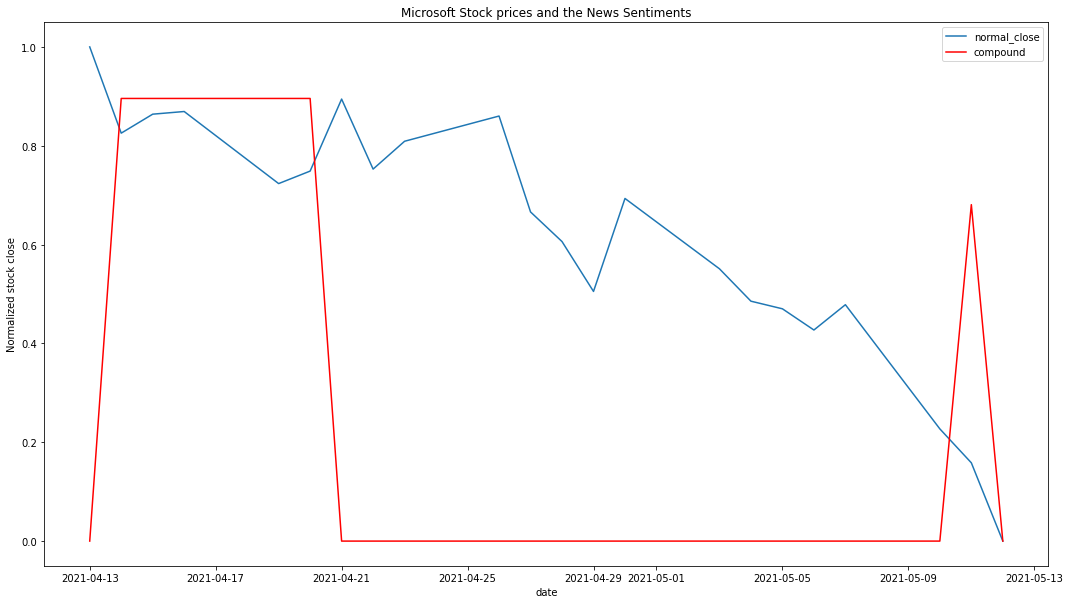

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# gca stands for 'get current axis'
ax = plt.gca()
df_mergeds.plot(kind='line',x='date',y='normal_close',ax=ax, figsize=(18,10))
ax.set_ylabel("Normalized stock close")
df_mergeds.plot(kind='line',x='date',y='compound', color='red',title='Microsoft Stock prices and the News Sentiments', ax=ax, figsize=(18,10))
#plt.show()